The data being used is provided by the UCI Machine Learning Repository and was collected from the 1994 Census. The data used is a sample of the 1994 Census and is not necessarily representative of the entire American population. More information can be found in the adult.names file or http://archive.ics.uci.edu/ml/datasets/Adult.

# Columns

<strong>age</strong>: Continuous.<br>
<strong>workclass</strong>: Categorical.<br>
<strong>fnlwgt</strong>: Continuous. Weight values given to each person by the Census Bureau, where people with similar demographic characteristics should have similar weights.<br>
<strong>education</strong>: Categorical.<br>
<strong>education-num</strong>: Continuous. Number value that is assigned according to a person's highest achieved education.<br>
<strong>marital-status</strong>: Categorical.<br>
<strong>occupation</strong>: Categorical.<br>
<strong>relationship</strong>: Categorical.<br>
<strong>race</strong>: Categorical.<br>
<strong>sex</strong>: Categorical.<br>
<strong>capital-gain</strong>: Continuous. A person's profits from an asset.<br>
<strong>capital-loss</strong>: Continuous. A person's loss due to the decrease in value of an asset.<br>
<strong>hours-per-week</strong>: Continuous.<br>
<strong>native-country</strong>: Categorical.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Column names have been taken from the adult.names file. Examining the adult.data file shows us that the values are
# separated by a comma followed by a space; hence, we can use the read_csv method along with the proper delimiter
# argument to extract the data. 

# Note that there is another column "income > 50k". This column is not explicitly mentioned in the adult.names file,
# but it indicates whether a person has an annual income greater than $50k.
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", 
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "income > 50k"]
data = pd.read_csv("adult.data", names = cols, index_col=False, delimiter = ", ", engine = "python")
df = data.copy()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income > 50k      0
dtype: int64

# Goals

1. Drop the fnlwgt and education-num columns, since they will not be useful.<br>
2. Clean any erroneous values from each column. The workclass and marital-status columns will be looked at simultaneously, as well as the marital-status and relationship columns, since these form pairs of columns that are related.<br>
3. Create any potentially useful columns by grouping values from existing columns.

# Drop fnlwgt and education-num columns

In [4]:
df = df.drop(['fnlwgt', 'education-num'], axis = 1)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Age

In [5]:
# Check for bad values
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

# Education and Higher-education

In [6]:
# Check for bad values
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [7]:
# Separate values between whether or not they indicate higher education
higherEd = ["Bachelors", "Masters", "Assoc-acdm", "Assoc-voc", "Doctorate", "Prof-school"]
achievedHigherEd = [1 if entry in higherEd else 0 for entry in df["education"]]

In [8]:
# Add a new column to the dataframe indicating whether or not the person has achieved some higher education
df["higher-education"] = achievedHigherEd
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


# Race

In [9]:
# Check for bad values
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

# Sex

In [10]:
# Check for bad values
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

# Capital-gain

In [13]:
# Check for bad values
df["capital-gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [14]:
# We should check to make sure that if a person's capital value is not 0, then that person's capital
# loss should be 0.
len(df[(df["capital-gain"] > 0) & (df["capital-loss"] > 0)])

0

# Capital-loss

In [15]:
# Check for bad values
df["capital-loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

# Hours-per-week

In [16]:
# Check for bad values
df["hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

# Native-country and Native-region

In [17]:
# Check for bad values
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [18]:
len(df[df["native-country"] == "?"])

583

In [19]:
df[df["native-country"] == "?"]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K,1
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K,0
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K,0
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,0
93,30,Private,HS-grad,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K,1
32469,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K,1
32492,42,Self-emp-not-inc,HS-grad,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K,0
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K,0


In [20]:
# To fill in the missing values, we'll take the most common native-countries according the race of each person.
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [21]:
for race in df["race"].unique():
    print(df[df["race"] == race].mode()["native-country"])

0    United-States
Name: native-country, dtype: object
0    United-States
Name: native-country, dtype: object
0    United-States
1              NaN
Name: native-country, dtype: object
0    United-States
1              NaN
Name: native-country, dtype: object
0    United-States
1              NaN
Name: native-country, dtype: object


In [22]:
df["native-country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [23]:
29170/len(df)

0.895857006848684

In [24]:
# The most common native country for every race is the United States, though this is not suprising if we consider
# the fact that the United States is the native country for nearly 90% of all people in the dataset.
df.loc[df["native-country"] == "?", "native-country"] = "United-States"
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [25]:
# The next issue is that are two countries in here that are listed as "South" and "Hong". Since this data is taken from
# the 1994 census, "Hong" likely means Hong Kong, since it had not yet become a part of China. "South", however, could
# mean multiple countries, such as South Korea, South Africa, or South Sudan. To determine what "South" is, we'll look
# at the most common race of people whose native-country is "South".
df[df["native-country"] == "South"]["race"].value_counts()

Asian-Pac-Islander    77
Amer-Indian-Eskimo     2
White                  1
Name: race, dtype: int64

In [26]:
# Since 77/80 people from "South" are listed as Asian-Pac-Islander, we can safely assume that "South" refers to South
# Korea and replace it with "South-Korea".
df.loc[df["native-country"] == "South", "native-country"] = "South-Korea"
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'South-Korea', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia',
       'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti',
       'Portugal', 'Dominican-Republic', 'El-Salvador', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [27]:
# Now, we'll replace "Hong" with "Hong-Kong"
df.loc[df["native-country"] == "Hong", "native-country"] = "Hong-Kong"
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'South-Korea', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia',
       'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti',
       'Portugal', 'Dominican-Republic', 'El-Salvador', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong-Kong', 'Ireland',
       'Hungary', 'Holand-Netherlands'], dtype=object)

We want to be able to group people by their native region, so we'll make a new column, native-region,
by grouping native countries by their region. Regions have been taken from https://www.internetworldstats.com/list1.htm#geo.

In [28]:
northAmerica = ["United-States", "Canada", "Outlying-US(Guam-USVI-etc)"]
latinAmerica = ["Cuba", "Jamaica", "Mexico", "Puerto-Rico", "Honduras", "Columbia", "Ecuador", "Haiti", 
                "Dominican-Republic", "El-Salvador", "Guatemala", "Peru", "Trinadad&Tobago",
                "Nicaragua"]
eastAsia = ["South-Korea", "Taiwan", "China", "Japan", "Hong-Kong"]
southCentralAsia = ["India", "Iran"]
southEastAsia = ["Philippines", "Cambodia", "Thailand", "Laos", "Vietnam"]
europe = ["England", "Germany", "Italy", "Poland", "Portugal", "France", "Yugoslavia", "Scotland", "Greece",
          "Ireland", "Hungary", "Holand-Netherlands"]
#africa = []

To my suprise, not a single country from Africa was listed.

In [29]:
nativeRegion = []
for c in df["native-country"]:
    if c in northAmerica:
        nativeRegion.append("North-America")
    elif c in latinAmerica:
        nativeRegion.append("Latin-America")
    elif c in eastAsia:
        nativeRegion.append("East-Asia")
    elif c in southCentralAsia:
        nativeRegion.append("South-Central-Asia")
    elif c in southEastAsia:
        nativeRegion.append("South-East-Asia")
    elif c in europe:
        nativeRegion.append("Europe")
len(nativeRegion)

32561

In [30]:
# The length of the nativeRegion list matches the number of rows in the dataset, so we can safely say
# that every country in the dataset was mapped to a region. So, we'll add the native-region column to
# the dataframe.
df["native-region"] = nativeRegion
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education,native-region
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,North-America
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,North-America
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,North-America
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,North-America
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,Latin-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1,North-America
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,North-America
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,North-America
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,North-America


# Income > 50k

In [31]:
# Check for bad values
df["income > 50k"].unique()

array(['<=50K', '>50K'], dtype=object)

In [32]:
# Replace '>50K' with 1 and '<=50k' with 0
df.loc[df["income > 50k"] == ">50K", "income > 50k"] = 1
df.loc[df["income > 50k"] == "<=50K", "income > 50k"] = 0
df["income > 50k"].unique()

array([0, 1], dtype=object)

# Workclass and Occupation

In [33]:
# Check for bad values
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [34]:
len(df[df["workclass"] == "?"])

1836

In [35]:
len(df[df["workclass"] == "?"]) / len(df)

0.05638647461687295

<strong>6-5% of the dataset contains rows where the workclass value is missing</strong>, so we should not simply drop those rows.

In [36]:
df[(df["workclass"] == "?") & (df["occupation"] == "?")].equals(df[df["workclass"] == "?"])

True

Just as intuition might suggest, <strong>every row with a missing workclass value also has a missing occupation value<strong>.

In [37]:
df[(df["workclass"] != "?") & (df["occupation"] == "?")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education,native-region
5361,18,Never-worked,10th,Never-married,?,Own-child,White,Male,0,0,40,United-States,0,0,North-America
10845,23,Never-worked,7th-8th,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0,0,North-America
14772,17,Never-worked,10th,Never-married,?,Own-child,White,Male,0,0,30,United-States,0,0,North-America
20337,18,Never-worked,11th,Never-married,?,Own-child,White,Female,0,0,10,United-States,0,0,North-America
23232,20,Never-worked,Some-college,Never-married,?,Own-child,Black,Male,0,0,40,United-States,0,0,North-America
32304,30,Never-worked,HS-grad,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,0,0,North-America
32314,18,Never-worked,Some-college,Never-married,?,Own-child,White,Male,0,0,4,United-States,0,0,North-America


It appears that <strong>in every row where the occupation is missing but the workclass isn't, the workclass is "Never-worked"</strong>. This makes sense, since it should be impossible to list a job for someone that has never worked. However, we can see that the hours-per-week column is not 0 for any of these rows. Unless hours-per-week does not pertain to work hours, this data seems to be false.

In [38]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [39]:
df.dtypes

age                  int64
workclass           object
education           object
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income > 50k        object
higher-education     int64
native-region       object
dtype: object

For every person whose workclass is "Never-worked", we'll change their occupation to "None" and their hours-per-week to 0.

In [40]:
for i in range(len(df)):
    if df.loc[i, "workclass"] == "Never-worked":
        df.loc[i, "occupation"] = "None"
        df.loc[i, "hours-per-week"] = 0
df[df["workclass"] == "Never-worked"]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education,native-region
5361,18,Never-worked,10th,Never-married,None,Own-child,White,Male,0,0,0,United-States,0,0,North-America
10845,23,Never-worked,7th-8th,Divorced,None,Not-in-family,White,Male,0,0,0,United-States,0,0,North-America
14772,17,Never-worked,10th,Never-married,None,Own-child,White,Male,0,0,0,United-States,0,0,North-America
20337,18,Never-worked,11th,Never-married,None,Own-child,White,Female,0,0,0,United-States,0,0,North-America
23232,20,Never-worked,Some-college,Never-married,None,Own-child,Black,Male,0,0,0,United-States,0,0,North-America
32304,30,Never-worked,HS-grad,Married-civ-spouse,None,Wife,Black,Female,0,0,0,United-States,0,0,North-America
32314,18,Never-worked,Some-college,Never-married,None,Own-child,White,Male,0,0,0,United-States,0,0,North-America


In [41]:
df[df["occupation"] == "?"]["workclass"].unique()

array(['?'], dtype=object)

In [42]:
df[df["workclass"] == "?"]["occupation"].unique()

array(['?'], dtype=object)

Currently, <strong>in every entry where the occupation is unknown, the workclass is unknown. Conversely, for every entry where the workclass is unknown, the occupation is unknown</strong>. This leads me to believe that with the "Never-worked" rows being cleaned, it is possible that the two sets of entries could be equivalent.

In [43]:
df[df["occupation"] == "?"].equals(df[df["workclass"] == "?"])

True

In [44]:
len(df[df["occupation"] == "?"])/len(df)

0.05638647461687295

To avoid the loss of information that comes with dropping data, we'll instead replace all "?" entries with "Missing".

In [45]:
df.loc[df["workclass"] == "?", "workclass"] = "Missing"
df.loc[df["occupation"] == "?", "occupation"] = "Missing"

In [46]:
df[df["occupation"] == "Missing"].equals(df[df["workclass"] == "Missing"])

True

# Rearranging Columns

In [47]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income > 50k,higher-education,native-region
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1,North-America
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,North-America
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,North-America
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,North-America
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1,Latin-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,1,North-America
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0,North-America
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,North-America
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,North-America


We want the columns to be arranged so that related fields are next to each other.

In [48]:
df = df[["age", "workclass", "occupation", "hours-per-week", "education","higher-education","marital-status",
         "relationship","race","sex","capital-gain","capital-loss","native-country", "native-region",
         "income > 50k"]]
df

,age,workclass,occupation,hours-per-week,education,higher-education,marital-status,relationship,race,sex,capital-gain,capital-loss,native-country,native-region,income > 50k
0,39,State-gov,Adm-clerical,40,Bachelors,1,Never-married,Not-in-family,White,Male,2174,0,United-States,North-America,0
1,50,Self-emp-not-inc,Exec-managerial,13,Bachelors,1,Married-civ-spouse,Husband,White,Male,0,0,United-States,North-America,0
2,38,Private,Handlers-cleaners,40,HS-grad,0,Divorced,Not-in-family,White,Male,0,0,United-States,North-America,0
3,53,Private,Handlers-cleaners,40,11th,0,Married-civ-spouse,Husband,Black,Male,0,0,United-States,North-America,0
4,28,Private,Prof-specialty,40,Bachelors,1,Married-civ-spouse,Wife,Black,Female,0,0,Cuba,Latin-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Tech-support,38,Assoc-acdm,1,Married-civ-spouse,Wife,White,Female,0,0,United-States,North-America,0
32557,40,Private,Machine-op-inspct,40,HS-grad,0,Married-civ-spouse,Husband,White,Male,0,0,United-States,North-America,1
32558,58,Private,Adm-clerical,40,HS-grad,0,Widowed,Unmarried,White,Female,0,0,United-States,North-America,0
32559,22,Private,Adm-clerical,20,HS-grad,0,Never-married,Own-child,White,Male,0,0,United-States,North-America,0


# How many people have an income greater than $50K?

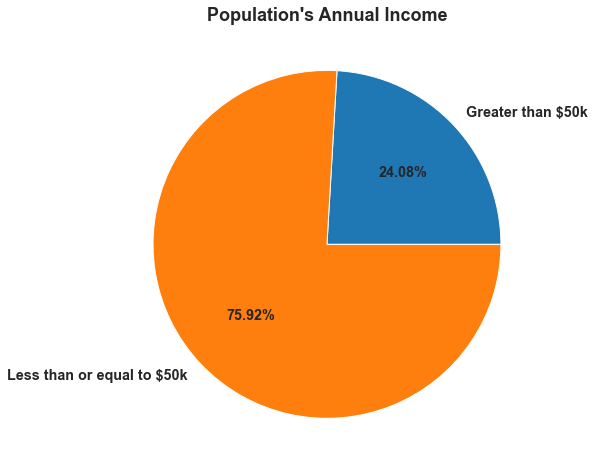

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie([len(df[df["income > 50k"] == 1]), len(df[df["income > 50k"] == 0])],
        labels = ["Greater than $50k", "Less than or equal to $50k"],
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Population's Annual Income", fontsize = 18, fontweight = 'bold')
plt.show()

The adult.names file states that 23.93-24.78% of people earn more than $50k per year, and this chart supports the claim.

# What is the most common work class among people that make more than $50k per year?

In [56]:
# Get a dataframe that only includes people that make more than $50k
dfGreater = df[df["income > 50k"] == 1]

In [58]:
# Create another dataframe that groups all people that make more than $50k by their workclass
dfGreaterByClass = dfGreater.groupby(by=["workclass"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterByClass

,workclass,income > 50k
0,Private,4963
1,Self-emp-not-inc,724
2,Self-emp-inc,622
3,Local-gov,617
4,Federal-gov,371
5,State-gov,353
6,Missing,191


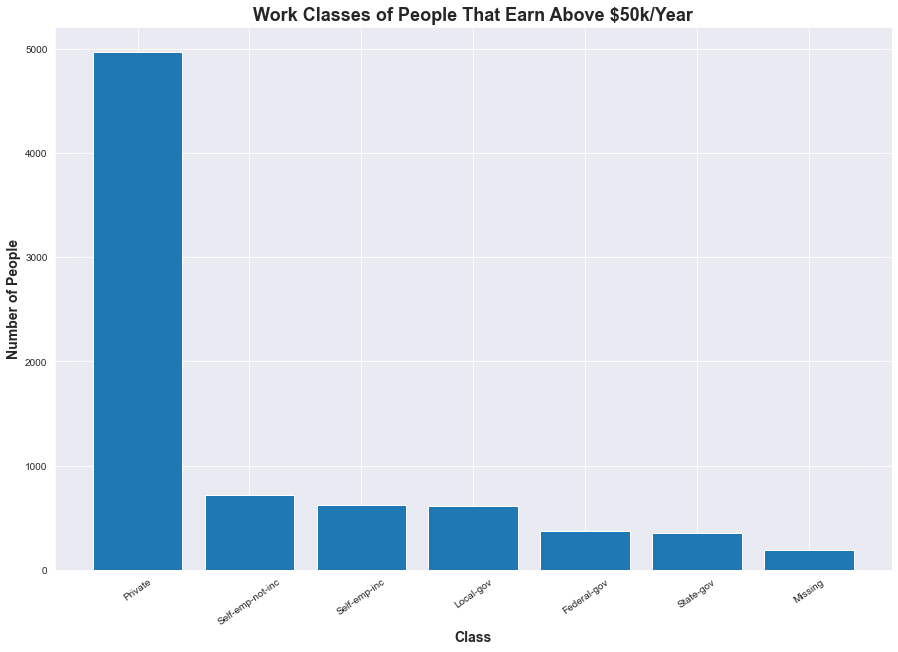

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfGreaterByClass["workclass"], height = dfGreaterByClass["income > 50k"])
plt.title("Work Classes of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

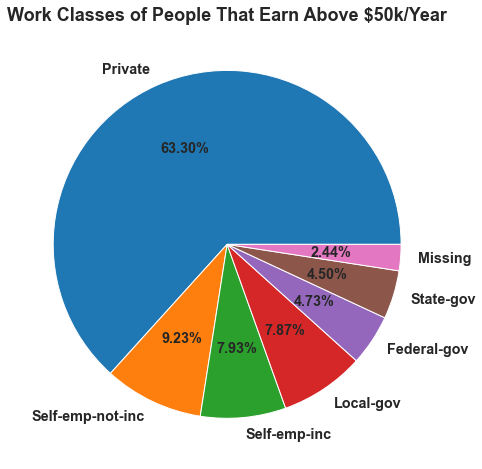

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie(dfGreaterByClass["income > 50k"],
        labels = dfGreaterByClass["workclass"].values,
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Work Classes of People That Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()

# What is the most common work class among people that don't make more than $50k per year?

In [61]:
# Get a dataframe that only includes people that don't make more than $50k
dfLess = df[df["income > 50k"] == 0]

In [62]:
# Make another dataframe that groups people that don't make more than $50k by their workclass
dfLessByClass = dfLess.groupby(by=["workclass"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessByClass

,workclass,income > 50k
0,Private,17733
1,Self-emp-not-inc,1817
2,Missing,1645
3,Local-gov,1476
4,State-gov,945
5,Federal-gov,589
6,Self-emp-inc,494
7,Without-pay,14
8,Never-worked,7


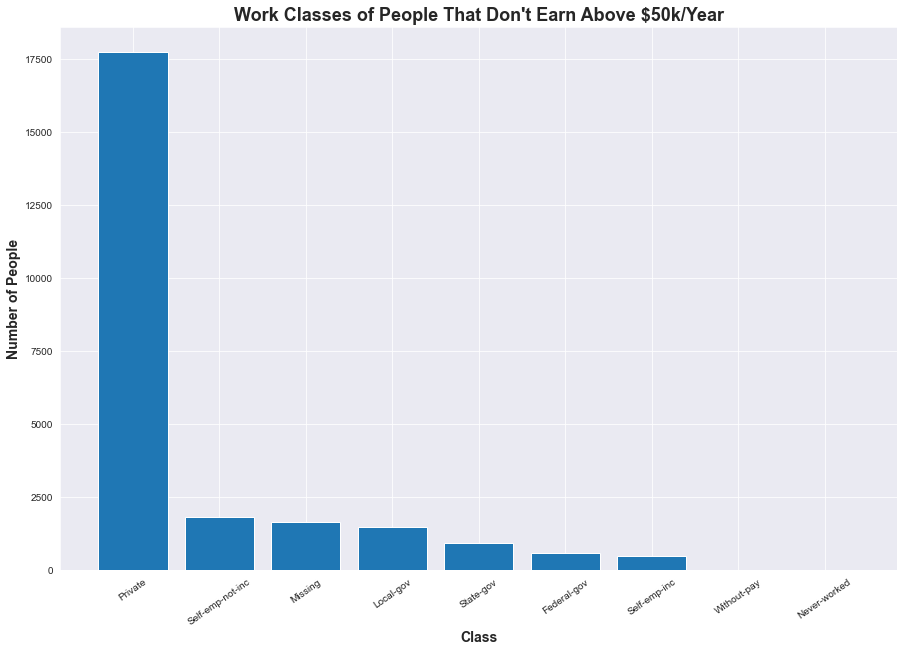

In [63]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfLessByClass["workclass"], height = dfLessByClass["income > 50k"])
plt.title("Work Classes of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

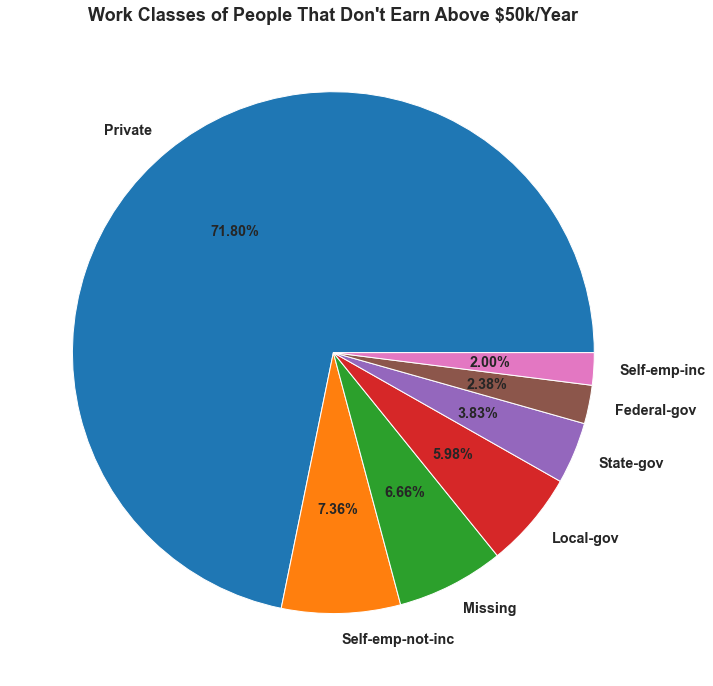

In [76]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,12))
plt.pie(dfLessByClass.iloc[0:-2,:]["income > 50k"],
        labels = dfLessByClass.iloc[0:-2,:]["workclass"].values,
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Work Classes of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()

Records of people in the "Without-pay" and "Never-worked" classes were dropped for the above chart, as their inclusion would only clutter the chart.

# What is the most common occupation among people that earn more than $50k?

In [77]:
# Make a dataframe that groups by occupation
dfGreaterByOccupation = dfGreater.groupby(by=["occupation"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterByOccupation

,occupation,income > 50k
0,Exec-managerial,1968
1,Prof-specialty,1859
2,Sales,983
3,Craft-repair,929
4,Adm-clerical,507
5,Transport-moving,320
6,Tech-support,283
7,Machine-op-inspct,250
8,Protective-serv,211
9,Missing,191


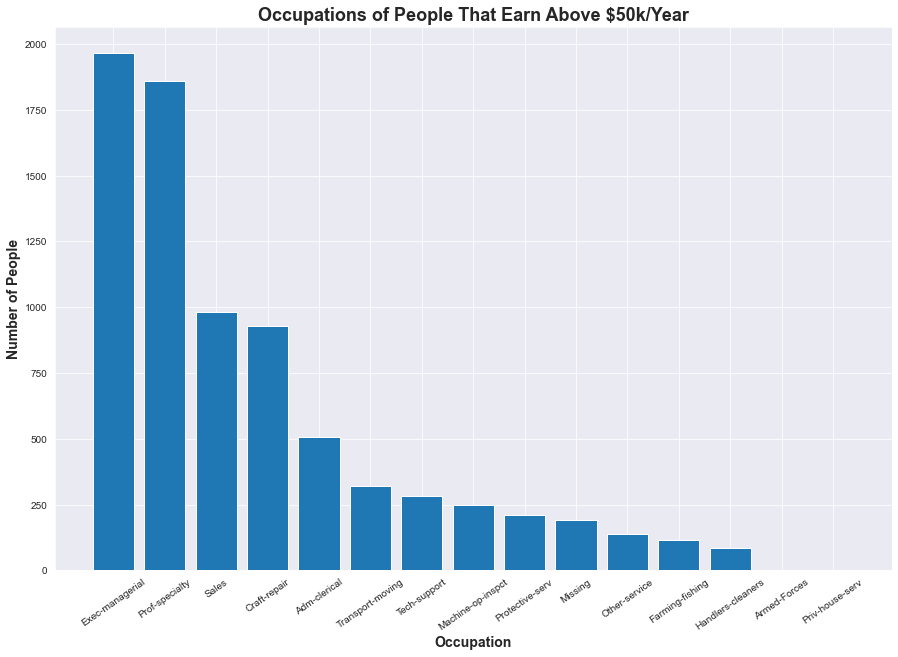

In [78]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfGreaterByOccupation["occupation"], height = dfGreaterByOccupation["income > 50k"])
plt.title("Occupations of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Occupation", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# What is the most common occupation among people that don't earn more than $50k?

In [79]:
# Make a dataframe that groups by occupation
dfLessByOccupation = dfLess.groupby(by=["occupation"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessByOccupation

,occupation,income > 50k
0,Adm-clerical,3263
1,Craft-repair,3170
2,Other-service,3158
3,Sales,2667
4,Prof-specialty,2281
5,Exec-managerial,2098
6,Machine-op-inspct,1752
7,Missing,1645
8,Handlers-cleaners,1284
9,Transport-moving,1277


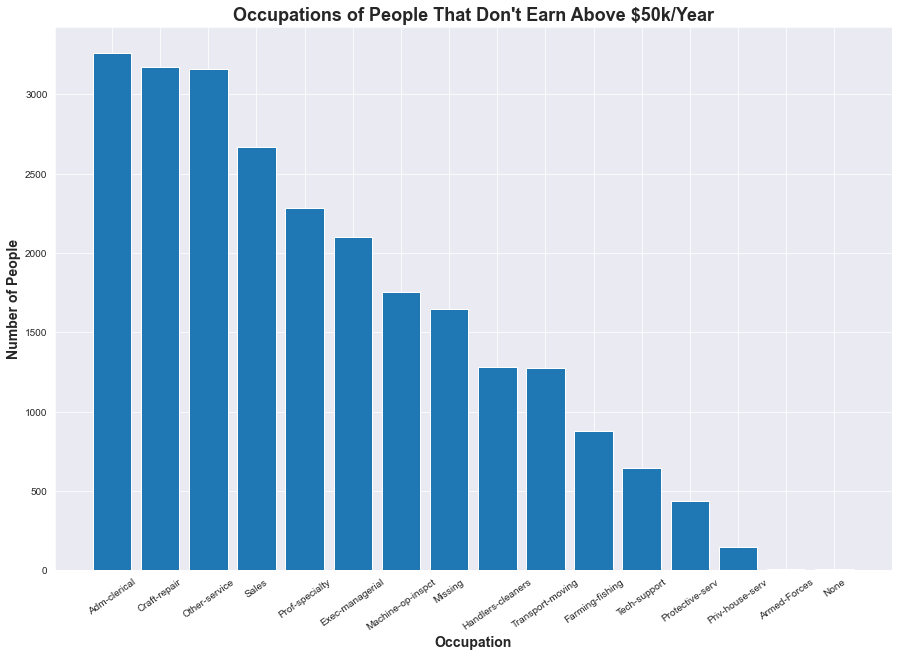

In [80]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfLessByOccupation["occupation"], height = dfLessByOccupation["income > 50k"])
plt.title("Occupations of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Occupation", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# What is the most common highest earned education of people that earn more than $50k?

In [81]:
dfGreaterByEducation = dfGreater.groupby(by=["education"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterByEducation

,education,income > 50k
0,Bachelors,2221
1,HS-grad,1675
2,Some-college,1387
3,Masters,959
4,Prof-school,423
5,Assoc-voc,361
6,Doctorate,306
7,Assoc-acdm,265
8,10th,62
9,11th,60


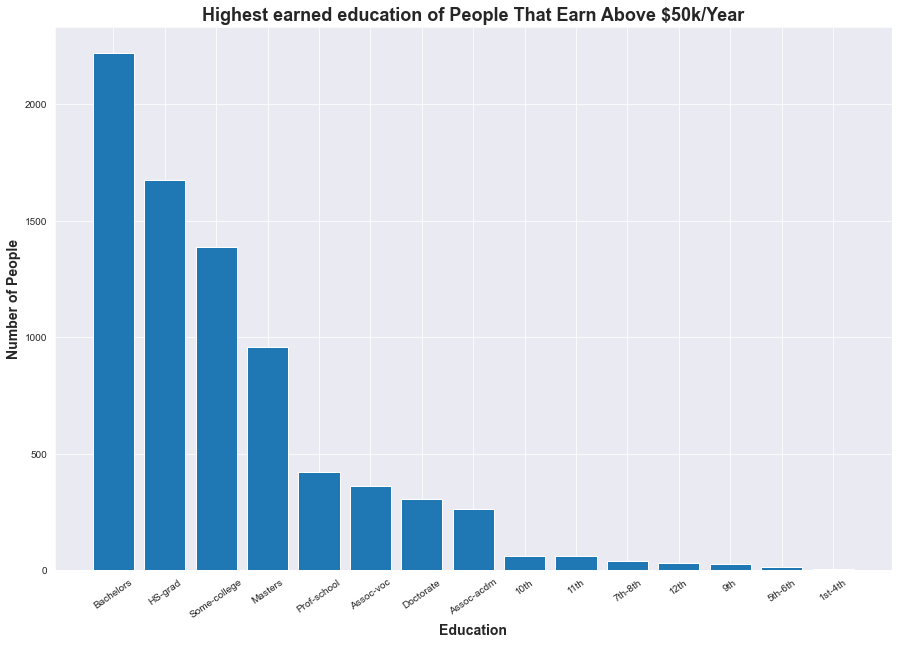

In [82]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfGreaterByEducation["education"], height = dfGreaterByEducation["income > 50k"])
plt.title("Highest Earned Education of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Education", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# What is the most common highest earned education of people that don't make more than $50k?

In [83]:
dfLessByEducation = dfLess.groupby(by=["education"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessByEducation

,education,income > 50k
0,HS-grad,8826
1,Some-college,5904
2,Bachelors,3134
3,11th,1115
4,Assoc-voc,1021
5,10th,871
6,Assoc-acdm,802
7,Masters,764
8,7th-8th,606
9,9th,487


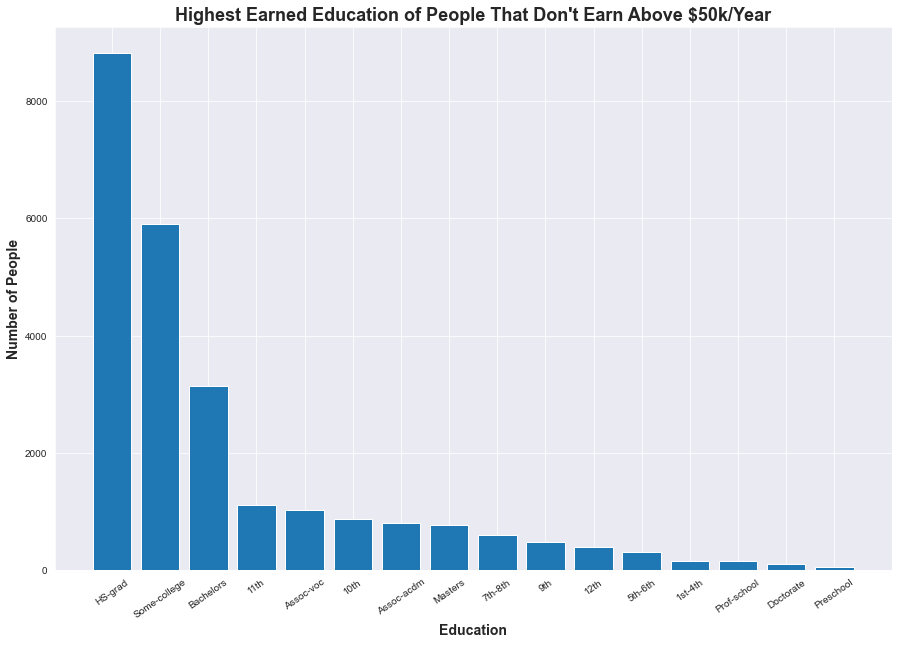

In [84]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfLessByEducation["education"], height = dfLessByEducation["income > 50k"])
plt.title("Highest Earned Education of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Education", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# How many people that earn more than $50k have finished postsecondary school?

In [85]:
dfGreaterHighEd = dfGreater.groupby(by=["higher-education"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterHighEd

,higher-education,income > 50k
0,1,4535
1,0,3306


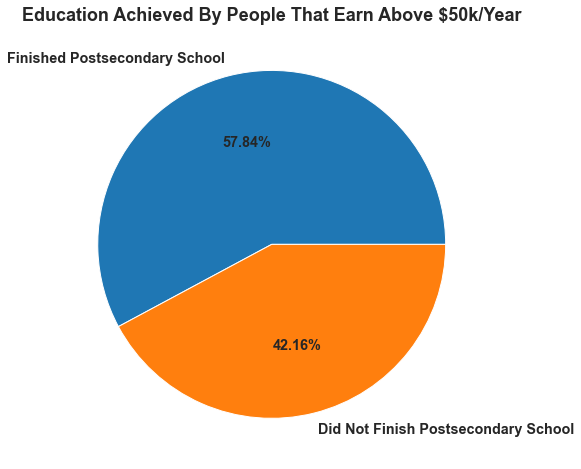

In [87]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie(dfGreaterHighEd["income > 50k"],
        labels = ["Finished Postsecondary School", "Did Not Finish Postsecondary School"],
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Education Achieved By People That Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()

# How many people that don't earn more than $50k have finished postsecondary school?

In [91]:
dfLessHighEd = dfLess.groupby(by=["higher-education"])["income > 50k"].count().sort_values().reset_index()
dfLessHighEd

,higher-education,income > 50k
0,1,5981
1,0,18739


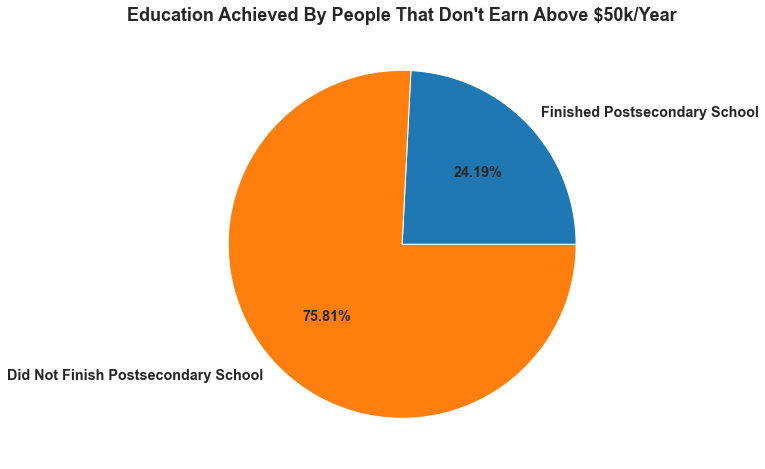

In [92]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie(dfLessHighEd["income > 50k"],
        labels = ["Finished Postsecondary School", "Did Not Finish Postsecondary School"],
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Education Achieved By People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()

# What is the marital status of people that earn more than $50k?

In [93]:
dfGreaterMarital = dfGreater.groupby(by=["marital-status"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterMarital

,marital-status,income > 50k
0,Married-civ-spouse,6692
1,Never-married,491
2,Divorced,463
3,Widowed,85
4,Separated,66
5,Married-spouse-absent,34
6,Married-AF-spouse,10


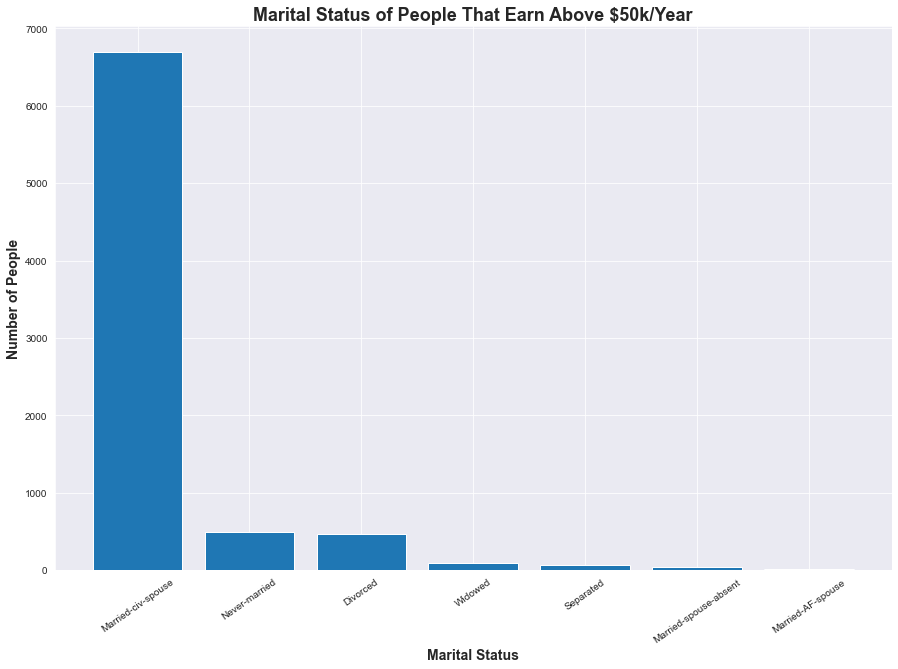

In [95]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfGreaterMarital["marital-status"], height = dfGreaterMarital["income > 50k"])
plt.title("Marital Status of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Marital Status", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# What is the martial status of people that don't earn more than $50k?

In [96]:
dfLessMarital = dfLess.groupby(by=["marital-status"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessMarital

,marital-status,income > 50k
0,Never-married,10192
1,Married-civ-spouse,8284
2,Divorced,3980
3,Separated,959
4,Widowed,908
5,Married-spouse-absent,384
6,Married-AF-spouse,13


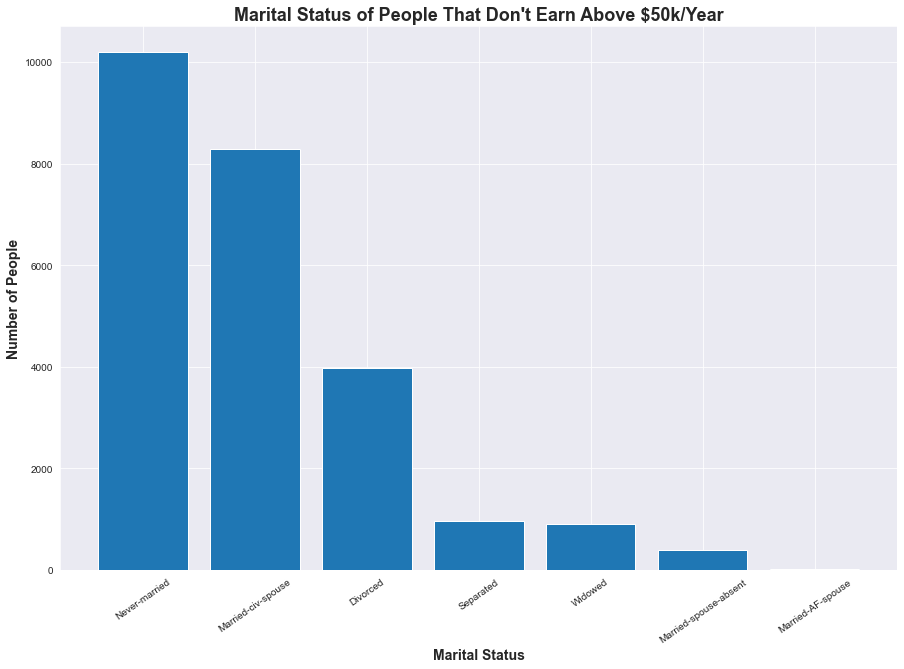

In [97]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,10))
plt.bar(x = dfLessMarital["marital-status"], height = dfLessMarital["income > 50k"])
plt.title("Marital Status of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Marital Status", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

# What is the age distribution of people that earn above $50k?

Text(0.5, 1.0, 'Age Distribution of People That Earn Above $50k/Year')

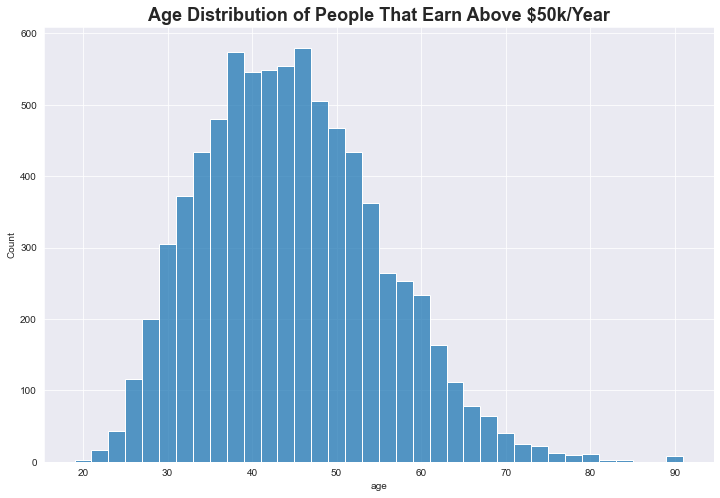

In [120]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
sns.histplot(dfGreater, x = "age", binwidth = 2)
plt.title("Age Distribution of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")

# What is the age distribution of people that don't earn above $50k?

Text(0.5, 1.0, "Age Distribution of People That Don't Earn Above $50k/Year")

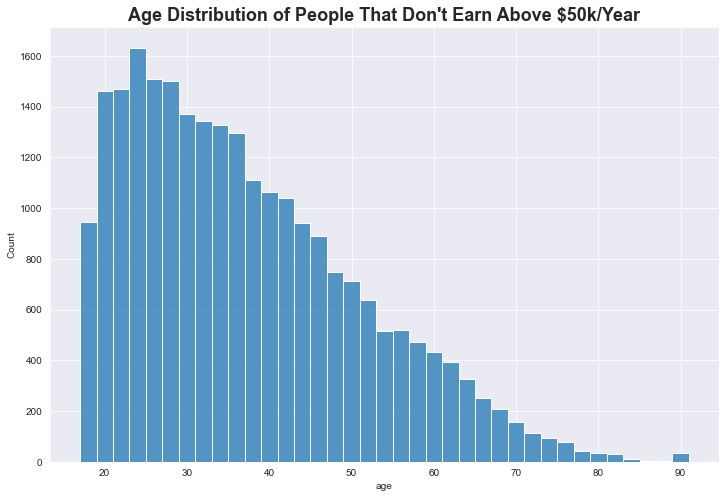

In [119]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
sns.histplot(dfLess, x = "age", binwidth = 2)
plt.title("Age Distribution of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")

# What is the race distribution of people counted in the census sample?

In [116]:
dfRace = df.groupby(by=["race"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfRace

,race,income > 50k
0,White,27816
1,Black,3124
2,Asian-Pac-Islander,1039
3,Amer-Indian-Eskimo,311
4,Other,271


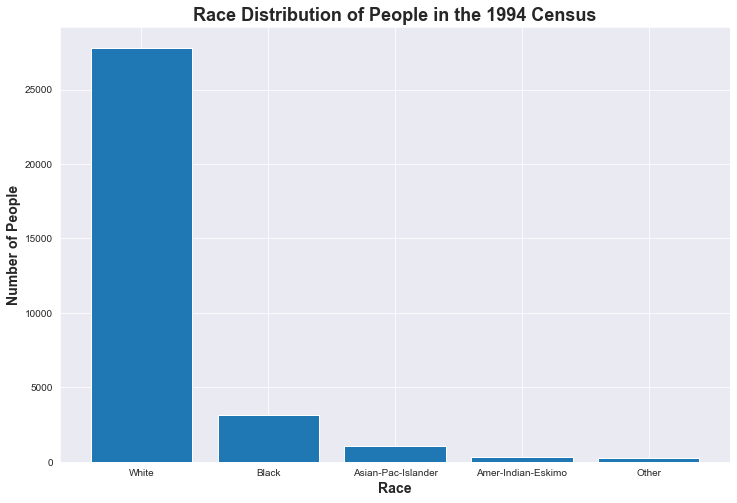

In [121]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfRace["race"], height = dfRace["income > 50k"])
plt.title("Race Distribution of People in the 1994 Census Sample", fontsize = 18, fontweight = "bold")
plt.xlabel("Race", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What is the race distribution of people that earn above $50k?

In [113]:
dfGreaterRace = dfGreater.groupby(by=["race"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterRace

,race,income > 50k
0,White,7117
1,Black,387
2,Asian-Pac-Islander,276
3,Amer-Indian-Eskimo,36
4,Other,25


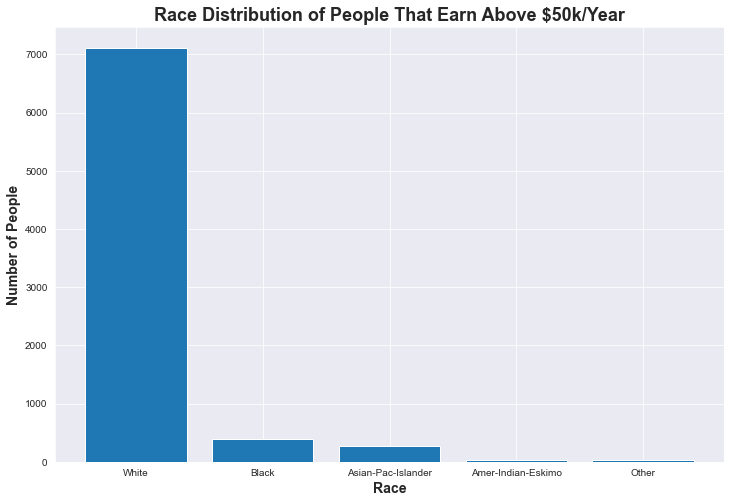

In [122]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfGreaterRace["race"], height = dfGreaterRace["income > 50k"])
plt.title("Race Distribution of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Race", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What is the race distribution of people that don't earn above $50k?

In [123]:
dfLessRace = dfLess.groupby(by=["race"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessRace

,race,income > 50k
0,White,20699
1,Black,2737
2,Asian-Pac-Islander,763
3,Amer-Indian-Eskimo,275
4,Other,246


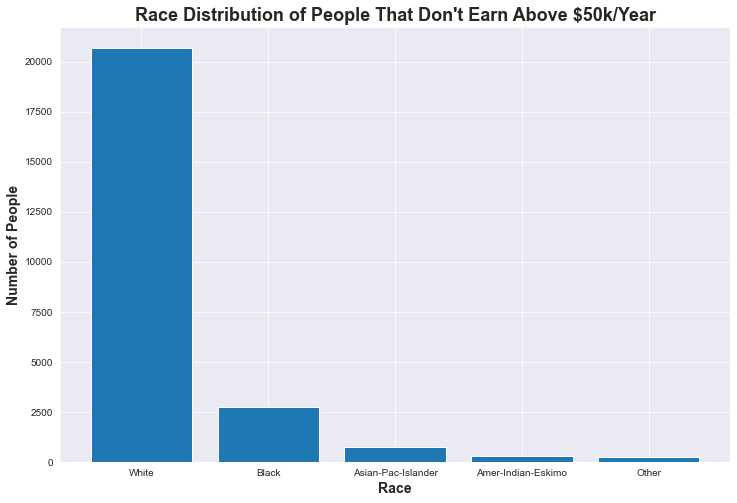

In [124]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfLessRace["race"], height = dfLessRace["income > 50k"])
plt.title("Race Distribution of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Race", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What is the sex distribution of people that earn above $50k?

In [125]:
dfGreaterSex = dfGreater.groupby(by=["sex"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterSex

,sex,income > 50k
0,Male,6662
1,Female,1179


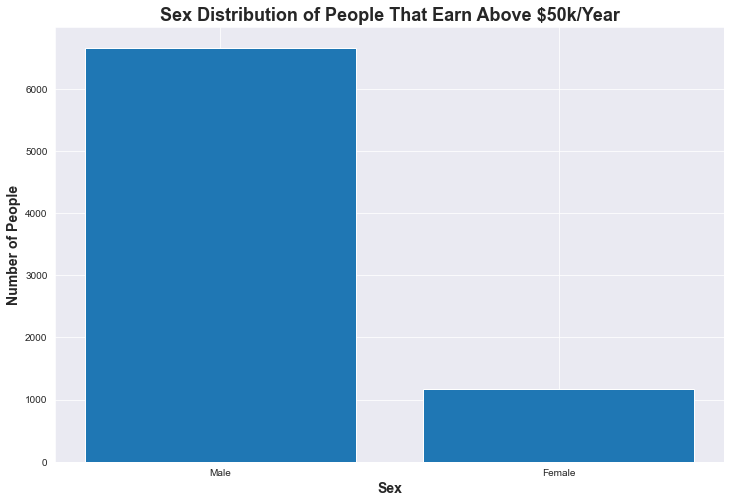

In [126]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfGreaterSex["sex"], height = dfGreaterSex["income > 50k"])
plt.title("Sex Distribution of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Sex", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What is the sex distribution of people that don't earn above $50k?

In [127]:
dfLessSex = dfLess.groupby(by=["sex"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessSex

,sex,income > 50k
0,Male,15128
1,Female,9592


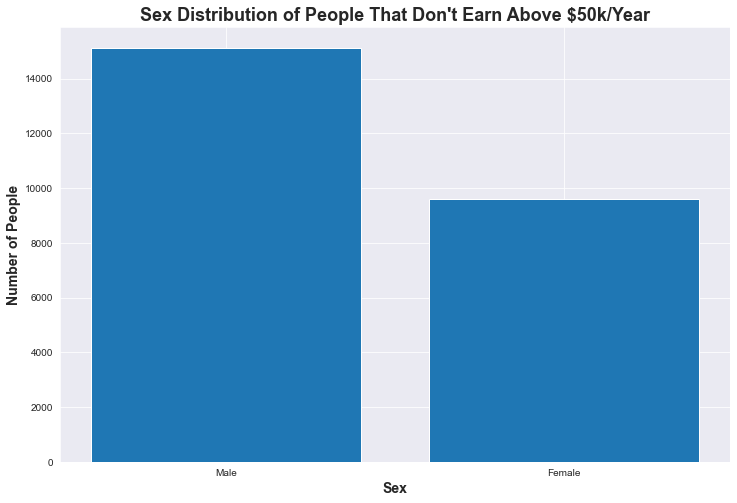

In [128]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfLessSex["sex"], height = dfLessSex["income > 50k"])
plt.title("Sex Distribution of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Sex", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What regions do people that earn above $50k come from?

In [131]:
dfGreaterRegion = dfGreater.groupby(by=["native-region"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfGreaterRegion

,native-region,income > 50k
0,North-America,7356
1,Europe,152
2,Latin-America,111
3,East-Asia,86
4,South-East-Asia,78
5,South-Central-Asia,58


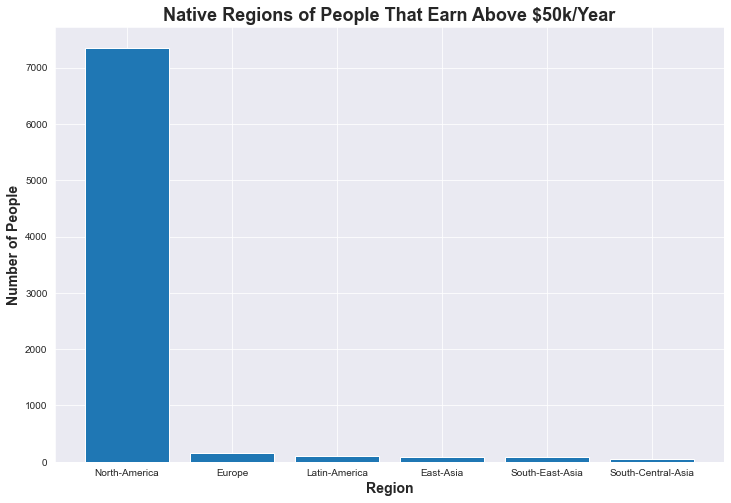

In [132]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfGreaterRegion["native-region"], height = dfGreaterRegion["income > 50k"])
plt.title("Native Regions of People That Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Region", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# What regions do people that don't earn above $50k come from?

In [133]:
dfLessRegion = dfLess.groupby(by=["native-region"])["income > 50k"].count().sort_values(ascending = False).reset_index()
dfLessRegion

,native-region,income > 50k
0,North-America,22532
1,Latin-America,1290
2,Europe,369
3,South-East-Asia,242
4,East-Asia,202
5,South-Central-Asia,85


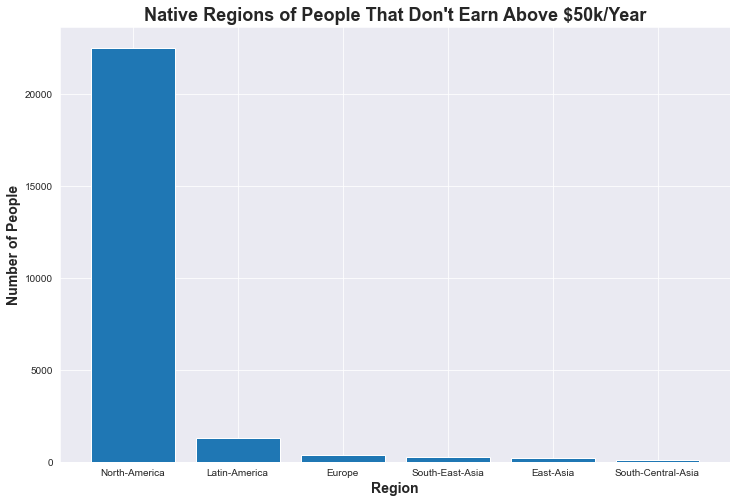

In [134]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.bar(x = dfLessRegion["native-region"], height = dfLessRegion["income > 50k"])
plt.title("Native Regions of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = "bold")
plt.xlabel("Region", fontsize = 14, fontweight = "bold")
plt.ylabel("Number of People", fontsize = 14, fontweight = "bold")
plt.show()

# How many people that earn above $50k have positive or negative capital gains?

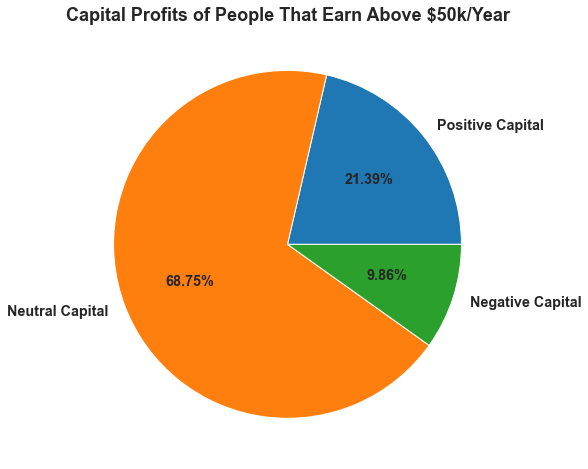

In [138]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie([len(dfGreater[dfGreater['capital-gain'] > 0]),
         len(dfGreater[(dfGreater["capital-gain"] == 0) & (dfGreater["capital-loss"] == 0)]),
         len(dfGreater[dfGreater['capital-loss'] > 0])
        ],
        labels = ["Positive Capital", "Neutral Capital", "Negative Capital"],
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Capital Profits of People That Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()

# How many people that don't earn above $50k have positive or negative capital gains?

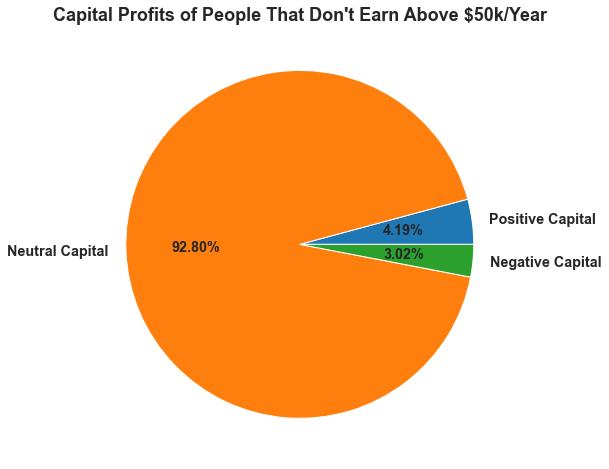

In [139]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
plt.pie([len(dfLess[dfLess['capital-gain'] > 0]),
         len(dfLess[(dfLess["capital-gain"] == 0) & (dfLess["capital-loss"] == 0)]),
         len(dfLess[dfLess['capital-loss'] > 0])
        ],
        labels = ["Positive Capital", "Neutral Capital", "Negative Capital"],
        autopct = '%.2f%%',
        textprops = {'size': 'x-large',
                     'fontweight': 'bold',
                     }
        )
plt.title("Capital Profits of People That Don't Earn Above $50k/Year", fontsize = 18, fontweight = 'bold')
plt.show()